In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# load data
iris=datasets.load_iris()
X=iris.data
y=iris.target

In [5]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [6]:
y[:5]

array([0, 0, 0, 0, 0])

In [19]:
# cada una de las categorias se encuentra balanceada.
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))

In [8]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [9]:
# make the split
X_train, X_test, y_train, y_test=train_test_split(
                            X,
                            y,
                            test_size=0.2,
                            random_state=0,
)

In [20]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([11, 13,  6], dtype=int64))

In [10]:
# create standarized
standardizer=StandardScaler()
X_train_std=standardizer.fit_transform(X_train)

In [11]:
X_train_std[:5]

array([[ 0.61303014,  0.10850105,  0.94751783,  0.736072  ],
       [-0.56776627, -0.12400121,  0.38491447,  0.34752959],
       [-0.80392556,  1.03851009, -1.30289562, -1.33615415],
       [ 0.25879121, -0.12400121,  0.60995581,  0.736072  ],
       [ 0.61303014, -0.58900572,  1.00377816,  1.25412853]])

In [12]:
# Train the model
clasifier=KNeighborsClassifier(n_neighbors=5)
model_knn=clasifier.fit(X_train_std, y_train)

In [13]:
# for prediction we need scale data test
standardizer=StandardScaler()
X_test_std=standardizer.fit_transform(X_test)

In [14]:
X_test_std[:5]

array([[ 0.14956537, -0.6062277 ,  0.94476368,  1.91948971],
       [ 0.43000045, -1.93697143,  0.28422975, -0.10102577],
       [-0.27108724,  2.49884101, -1.27703226, -1.25560605],
       [ 2.25282843, -0.38443708,  1.66534614,  1.0535545 ],
       [-0.97217492,  0.72451603, -1.21698372, -1.25560605]])

In [15]:
y_predict=model_knn.predict(X_test_std)
y_predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 2, 2, 0, 2, 1, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 1, 1, 0])

In [17]:
y_predict_prob=model_knn.predict_proba(X_test_std)
y_predict_prob[:5]

array([[0. , 0. , 1. ],
       [0. , 0.8, 0.2],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ]])

Text(0.5, 15.0, 'Prediccion')

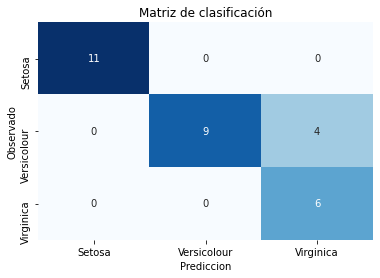

In [21]:
matrix=confusion_matrix(y_test, y_predict)
matrix
class_names=['Setosa','Versicolour','Virginica']
# create dataframe
dataframe_graf=pd.DataFrame(matrix, index=class_names, columns=class_names)
# create headmap
sns.heatmap(dataframe_graf, annot=True, cbar=None, cmap="Blues")
plt.title("Matriz de clasificación")
plt.ylabel("Observado")
plt.xlabel("Prediccion")


In [22]:
accuracy_sklearn=accuracy_score(y_test,y_predict)
print(f"Acucuracy of model with sklearn: {accuracy_sklearn}")

Acucuracy of model with sklearn: 0.8666666666666667


In [24]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.69      0.82        13
           2       0.60      1.00      0.75         6

    accuracy                           0.87        30
   macro avg       0.87      0.90      0.86        30
weighted avg       0.92      0.87      0.87        30



## Pipeline para encontra el mejor k

In [47]:
# import libraries
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [48]:
# create a pipeline
pipe=Pipeline([("standardizer", standardizer),("knn", clasifier)])

In [49]:
param_grid = {
    'knn__n_neighbors': [1,2,3,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
}

In [50]:
# create GridSearch
best_clasifier=GridSearchCV(pipe, param_grid, cv=5, verbose=0).fit(X_train,y_train)

In [51]:
best_clasifier.best_estimator_

Pipeline(steps=[('standardizer', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=13))])

In [52]:
best_model=best_clasifier.fit(X_train_std,y_train)

In [53]:
prediccionBestModel=best_model.predict(X_test_std)

Text(0.5, 15.0, 'Prediccion')

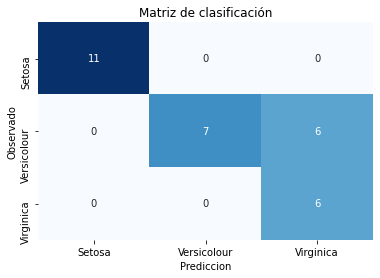

In [54]:
matrix=confusion_matrix(y_test, prediccionBestModel)
matrix
class_names=['Setosa','Versicolour','Virginica']
# create dataframe
dataframe_graf=pd.DataFrame(matrix, index=class_names, columns=class_names)
# create headmap
sns.heatmap(dataframe_graf, annot=True, cbar=None, cmap="Blues")
plt.title("Matriz de clasificación")
plt.ylabel("Observado")
plt.xlabel("Prediccion")

In [55]:
print(classification_report(y_test, prediccionBestModel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.54      0.70        13
           2       0.50      1.00      0.67         6

    accuracy                           0.80        30
   macro avg       0.83      0.85      0.79        30
weighted avg       0.90      0.80      0.80        30

